# Improving Data Visualizations

This training module was developed by Alexis Payton, Dr. Elise Hickman, and Dr. Julia E. Rager

Fall 2023

## Introduction to Training Module

Data visualizations are used to convey concepts and key takeaways from an analysis in a clear in succinct way. In environmental health research, this is of particular importance for high dimensional datasets that will typically have more results that need to be communicated to a reader. Often times, readers take a look at the figures before deciding whether to read the paper, therefore their importance cannot be understated. The best visualizations intentionally use 
- color
- ordering
- size
- minimal text, etc. 

to convey those concepts to the reader faster.

In this module, `ggplot2`, R's data visualization package will be used to walk through ways to improve data visualizations. We'll recreate two figures (ie. the boxplot and heat map) constructed in the previous [TAME 2.0 Module 3.1 Data Visualizations](insert link here) and improve them so they are publication-ready. 

The data to be used in this module was described and referenced previously in [TAME 2.0 Module 3.1 Data Visualizations](insert link here). 

### Installing required R packages
If you already have these packages installed, you can skip this step, or you can run the below code which checks installation status for you

In [ ]:
if (!requireNamespace("MetBrewer"))
  install.packages("MetBrewer");
if (!requireNamespace("RColorBrewer"))
  install.packages("RColorBrewer");

### Loading required R packages

In [1]:
library(ggplot2)
library(tidyverse)
library(MetBrewer)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Set your working directory

In [ ]:
setwd("/filepath to where your input files are")

### Importing example dataset
Then let's read in our example dataset. As mentioned in the introduction, this example dataset represents chemical measurements across 12 different biomass burn scenarios, representing potential wildfire events. Let's upload and view these data:

In [2]:
# Load the data
smoke_data <- read.csv("Module3_2/Module3_2_DataforVisualizations.csv")

# View the top of the dataset
head(smoke_data) 

,Chemical.Category,Chemical,CASRN,Eucalyptus_Smoldering,Eucalyptus_Flaming,Peat_Smoldering,Peat_Flaming,Pine_Smoldering,Pine_Flaming,Pine_Needles_Smoldering,Pine_Needles_Flaming,Red_Oak_Smoldering,Red_Oak_Flaming,Units
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,n-Alkanes,2-Methylnonadecane,1560-86-7,0.06,0.06,1.36,0.06,0.06,0.06,0.06,0.06,0.06,0.13,ng_per_uL
2,n-Alkanes,3-Methylnonadecane,6418-45-7,0.04,0.04,1.13,0.90,0.47,0.04,0.04,0.72,0.04,0.77,ng_per_uL
3,n-Alkanes,Docosane,629-97-0,0.21,0.25,9.46,0.57,0.16,0.48,0.32,0.18,0.16,0.36,ng_per_uL
4,n-Alkanes,Dodecylcyclohexane,1795-17-1,0.04,0.04,0.25,0.04,0.04,0.04,0.12,0.04,0.04,0.04,ng_per_uL
5,n-Alkanes,Eicosane,112-95-8,0.11,0.25,7.55,0.54,0.17,0.29,0.28,0.16,0.15,0.38,ng_per_uL
6,n-Alkanes,Heneicosane,629-94-7,0.13,0.28,6.77,0.34,0.13,0.42,0.30,0.13,0.13,0.69,ng_per_uL


Now that we've been able to view the dataset, let's come up with questions that can be answered with our boxplot and heat map figure. This will inform how we format the dataframe for visualization.

## Training Module's Environmental Health Questions 
This training module was specifically developed to answer the following environmental health questions:
1. Boxplot: Which biomass burn condition has the highest chemical concentration?
2. Heat Map: Under which biomass burn conditions, are concentrations of certain chemical categories the highest?

### Formatting dataframes for downstream visualization code
First, format the dataframe by changing it from a wide to long format and normalizing the chemical concentration data. For more details on this data reshaping visit [TAME 2.0 Module 2.3 Data Manipulation & Reshaping](insert link). 

In [3]:
scaled_longer_smoke_data = pivot_longer(smoke_data, cols = 4:13, names_to = "Biomass_Burn_Condition", 
                                 values_to = "Chemical_Concentration") %>%
    # scaling within each chemical
    group_by(Chemical) %>%
    mutate(Scaled_Chemical_Concentration = scale(Chemical_Concentration)) %>%
    ungroup()

head(scaled_longer_smoke_data)

Chemical.Category,Chemical,CASRN,Units,Biomass_Burn_Condition,Chemical_Concentration,Scaled_Chemical_Concentration
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,"<dbl[,1]>"
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus_Smoldering,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus_Flaming,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat_Smoldering,1.36,2.8419346
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat_Flaming,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine_Smoldering,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine_Flaming,0.06,-0.3347765


### Original Boxplot Version from TAME Module 3.1

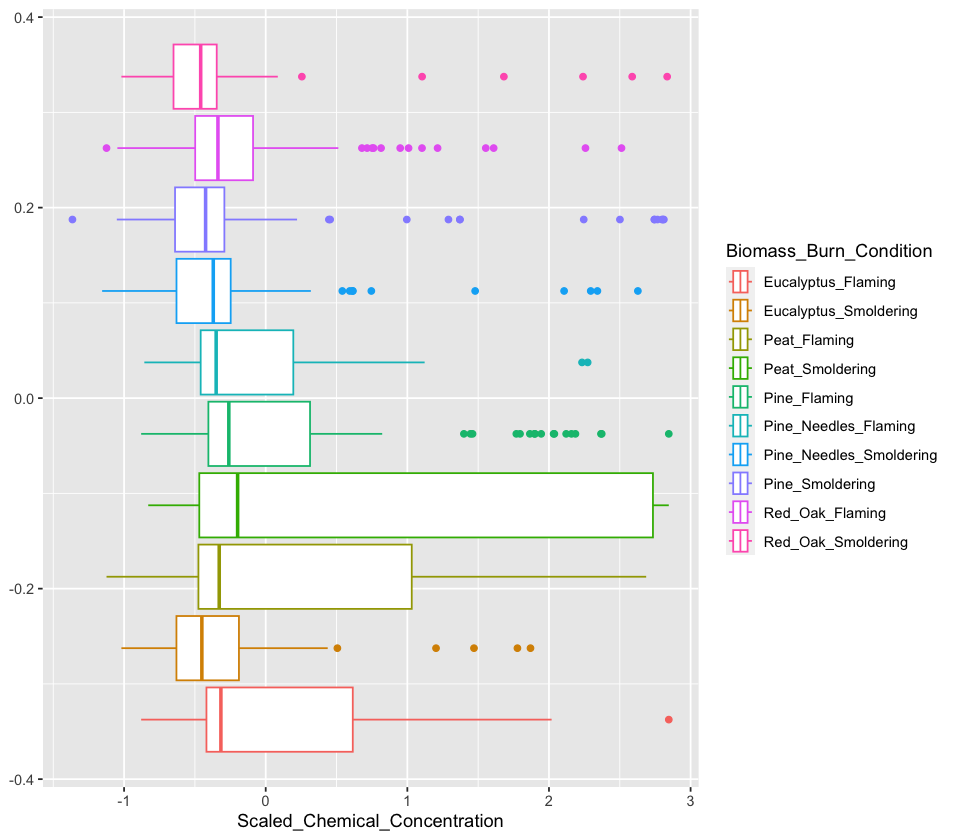

In [4]:
options(repr.plot.width=8, repr.plot.height=7) #changing size
ggplot(data = scaled_longer_smoke_data, aes(x = Scaled_Chemical_Concentration, color = Biomass_Burn_Condition)) + 
  geom_boxplot()

### There are three main aspects we can adjust on this figure:
**1. The legibility of the text in the legend and axes.**

Creating spaces between the text or exchanging the underscores for spaces improves the legibility of the figure. 
   
   
 **2. The order of the boxplots.**
 
Ordering the biomass burn conditions from highest to lowest based on their median scaled chemical concentration allows the reader to easily determine the biomass burn condition that had the greatest or least chemical concentrations relative to each other. In R, this can be done by putting the `Biomass_Burn_Condition` variable into a factor.
     
     
**3. Use of color.**

Variables can be visualized using color, text, size, etc. In this figure, it is redundant to have the biomass burn condition encoded in the legend and the color. Instead this variable can be put on the y axis and the legend will be removed to be more concise. The shades of the colors will also be changed, but to keep each burn condition distinct from each other, colors will be chosen that are distinct from one another. `MetBrewer` and `RColorBrewer` are packages that offer great color schemes. In addition, `ggsci` is a package that offers a collection of color palettes used in various scientific journals. 
   
For more information on `MetBrewer`, see its associated [RDocumentation](https://cran.r-project.org/web/packages/MetBrewer/index.html) and [example tutorial](https://github.com/BlakeRMills/MetBrewer). For more information on `RColorBrewer`, see its associated [RDocumentation](https://cran.r-project.org/web/packages/RColorBrewer/index.html) and [example tutorial](https://r-graph-gallery.com/38-rcolorbrewers-palettes.html). For more information on `ggsci`, see its associated [RDocumentation](https://cran.r-project.org/web/packages/ggsci/vignettes/ggsci.html). 

Let's start with addressing the **#1: Legibility of Axis Text**. The legend title and axis titles can easily be changed with `ggplot`, so that will be done later. To remove the underscore from the `Biomass_Burn_Condition` column, we can use the function `gsub`, which will replace all of the underscores with spaces, resulting in a cleaner-looking graph. 

In [5]:
# First adding spaces beteween the biomass burn conditions
scaled_longer_smoke_data = scaled_longer_smoke_data %>%
  mutate(Biomass_Burn_Condition = gsub("_", " ", Biomass_Burn_Condition))

# Viewing dataframe
head(scaled_longer_smoke_data)

Chemical.Category,Chemical,CASRN,Units,Biomass_Burn_Condition,Chemical_Concentration,Scaled_Chemical_Concentration
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,"<dbl[,1]>"
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus Smoldering,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus Flaming,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat Smoldering,1.36,2.8419346
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat Flaming,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine Smoldering,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine Flaming,0.06,-0.3347765


**2. Reordering the boxplots based on the median scaled chemical concentration**.

After calculating the median scaled chemical concentration for each biomass burn condition, the new dataframe will be arranged from lowest to highest median scaled concentration from the top of the dataframe to the bottom. This order will be saved in a vector, `median_biomass_order`. Although the biomass burn conditions are saved from lowest to highest concentration, `ggplot` will plot them in reverse order with the highest concentration at the top and the lowest at the bottom of the y axis.

Axis reordering can also be accomplished using `reorder` within the `ggplot` function as described [here](https://guslipkin.medium.com/reordering-bar-and-column-charts-with-ggplot2-in-r-435fad1c643e) and [here](https://r-graph-gallery.com/267-reorder-a-variable-in-ggplot2.html).

In [6]:
median_biomass = scaled_longer_smoke_data %>%
    group_by(Biomass_Burn_Condition) %>%
    summarize(Median_Concentration = median(Scaled_Chemical_Concentration)) %>%
    # arranges dataframe from lowest to highest from top to bottom
    arrange(Median_Concentration)

head(median_biomass)

# Saving that order
median_biomass_order = median_biomass$Biomass_Burn_Condition

Biomass_Burn_Condition,Median_Concentration
<chr>,<dbl>
Red Oak Smoldering,-0.4590961
Eucalyptus Smoldering,-0.4508589
Pine Smoldering,-0.4244289
Pine Needles Smoldering,-0.3702707
Pine Needles Flaming,-0.3498902
Red Oak Flaming,-0.3373308


In [7]:
# Putting into factor to organize the burn conditions
scaled_longer_smoke_data$Biomass_Burn_Condition = factor(scaled_longer_smoke_data$Biomass_Burn_Condition, 
                                                                levels = median_biomass_order)

# Final dataframe to be used for plotting
head(scaled_longer_smoke_data)

Chemical.Category,Chemical,CASRN,Units,Biomass_Burn_Condition,Chemical_Concentration,Scaled_Chemical_Concentration
<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,"<dbl[,1]>"
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus Smoldering,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus Flaming,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat Smoldering,1.36,2.8419346
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat Flaming,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine Smoldering,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine Flaming,0.06,-0.3347765


Now that the dataframe has been finalized, we can plot the new boxplot. The final revision, **#3: Making Use of Color**, will be addressed with `ggplot`. However, a palette can be chosen from the `MetBrewer` package.

In [7]:
# Choosing the "Jurarez" palette from the `MetBrewer` package
# `n = 12`, since there are 12 biomass burn conditions
juarez_colors = met.brewer(name = "Juarez", n = 12)[1:12]

### Improved Version

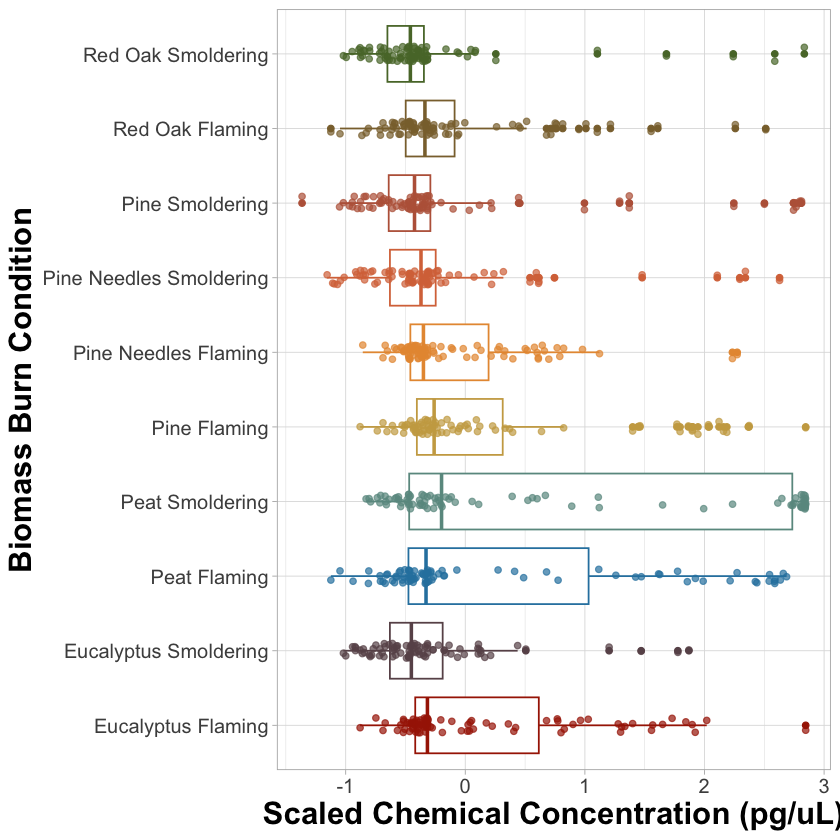

In [8]:
options(repr.plot.width=7, repr.plot.height=7) # changing dimensions of the entire figure

ggplot(scaled_longer_smoke_data, aes(x = Scaled_Chemical_Concentration, y = Biomass_Burn_Condition, 
                                   color = Biomass_Burn_Condition)) + 
  geom_boxplot() +
  # jittering the points, so they're not all on top of each other and adding transparency
  geom_point(position = position_jitter(h = 0.1), alpha = 0.7) + 

  theme_light() + # changing the theme
  theme(axis.text = element_text(size = 12), # changing size of axis labels
      axis.title = element_text(face = "bold", size = rel(1.7)), # changes axis titles
      legend.position = "none") + # removes legend

  xlab('Scaled Chemical Concentration (pg/uL)') + ylab('Biomass Burn Condition') + # changing axis labels 
  scale_color_manual(values = c(juarez_colors)) # changing the colors

*With this, we can answer **Environmental Health Question #1***: Which biomass burn condition has the highest chemical concentration?

**Answer**: Smoldering peat has the highest chemical concentration (based on the median), however there the median concentrations are comparable across all biomass burn conditions. All the flaming conditions have the highest chemical concentrations with the exception of smoldering peat. Flaming conditions tend to have more variation in the chemical concentrations than the smoldering conditions with the exception of smoldering peat.

You may notice that the scaled chemical concentration was put on the x axis and burn condition was put on the y axis and not vice versa. When names are longer in length, the names are more legible if that variable is placed on the y axis.

Other aspects of the figure were changed in the latest version, but those are minor compared to changing the order of the boxplots, revamping the text, and the usage of color. For example, the background was changed from gray to white. Figure backgrounds are generally white, because the figure is more legible in the instance the paper is printed in black and white. A plot's background can easily be changed to white in R using `theme_light` or `theme_minimal`. Posit provides a very helpful [GGplot2 cheat sheet](https://posit.co/resources/cheatsheets/?type=posit-cheatsheets&_page=2/) for changing a figure's parameters. 

<br>

We'll use a heat map to answer the second environmental health question: **Under which biomass burn conditions, are concentrations of certain chemical categories the highest?** 

Let's view what the original heat map looked like and find aspects of it that can be improved.

### Original Heat Map Version from TAME Module 3.1

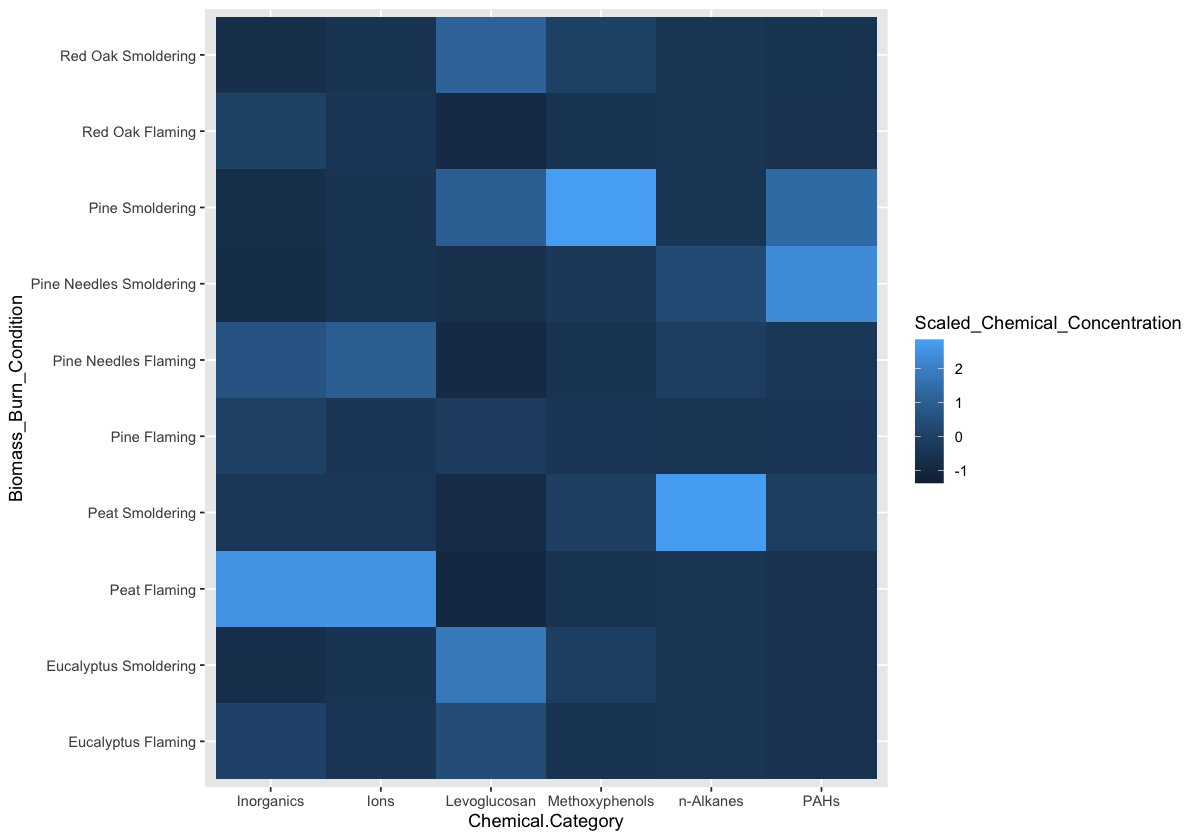

In [9]:
# Changing the biomass condition variable back to a character from a factor
scaled_longer_smoke_data$Biomass_Burn_Condition = as.character(scaled_longer_smoke_data$Biomass_Burn_Condition)

options(repr.plot.width = 10, repr.plot.height = 7)
ggplot(data = scaled_longer_smoke_data, aes(x = Chemical.Category, y = Biomass_Burn_Condition,
                                           fill = Scaled_Chemical_Concentration)) + 
  geom_tile()

### There are three main aspects we can adjust on this figure:
**1. The legibility of the text in the legend and axes.**

Similiar to what we did previously, we'll replace underscores and periods with spaces in the axis labels and titles. 
   
   
**2. The order of the axis labels.**
 
Ordering the biomass burn condition and chemical category from highest to lowest based on their median scaled chemical concentration allows the reader to easily determine the biomass burn condition that had the greatest or least chemical concentrations relative to each other. From the previous boxplot figure, biomass burn condition is already in this order, however we need to order the chemical category by putting the variable into a factor. 
      
     
**3. Use of color.**

Notice that in the boxplot we used a qualitative palette, which is best for creating visual differences between different classes or groups. In this heat map, we'll choose a diverging color palette that uses two or more contrasting colors. A diverging color palette is able to highlight mid range with a lighter color and values at either extreme with a darker color or vice versa.

Let's start with **#1: Legibility of Text** can be addressed in `ggplot` and so can **#2: Reordering the heat map**.

`Biomass_Burn_Condition` has already been reordered and put into a factor, but we need to do the same with `Chemical.Category`. Similiar to before, median scaled chemical concentration for each chemical category will be calculated. However, this time the new dataframe will be arranged from highest to lowest median scaled concentration from the top of the dataframe to the bottom. `ggplot` will plot them in the SAME order with the highest concentration on the left side and the lowest on the right side of the figure.

In [10]:
# Order the chemical category by the median scaled chemical concentration
median_chemical = scaled_longer_smoke_data %>%
    group_by(Chemical.Category) %>%
    summarize(Median_Concentration = median(Scaled_Chemical_Concentration)) %>%
    arrange(-Median_Concentration)

head(median_chemical)

# Saving that order
median_chemical_order = median_chemical$Chemical.Category

Chemical.Category,Median_Concentration
<chr>,<dbl>
Inorganics,-0.2649852
n-Alkanes,-0.3347765
Ions,-0.3587584
Levoglucosan,-0.4174552
Methoxyphenols,-0.4336010
PAHs,-0.4588916


In [11]:
# Putting into factor to organize the chemical categories
scaled_longer_smoke_data$Chemical.Category = factor(scaled_longer_smoke_data$Chemical.Category, 
                                                                levels = median_chemical_order)

# Putting burn conditons back into a factor to organize them
scaled_longer_smoke_data$Biomass_Burn_Condition = factor(scaled_longer_smoke_data$Biomass_Burn_Condition, 
                                                                levels = median_biomass_order)

# Final dataframe to be used for plotting
head(scaled_longer_smoke_data)

Chemical.Category,Chemical,CASRN,Units,Biomass_Burn_Condition,Chemical_Concentration,Scaled_Chemical_Concentration
<fct>,<chr>,<chr>,<chr>,<fct>,<dbl>,"<dbl[,1]>"
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus Smoldering,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus Flaming,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat Smoldering,1.36,2.8419346
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat Flaming,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine Smoldering,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine Flaming,0.06,-0.3347765


Now that the dataframe has been finalized, we can plot the new boxplot. The final revision, **#3: Making Use of Color**, will be addressed with `ggplot`. Here a palette is chosen from the `RColorBrewer` package.

In [12]:
# Only needed to choose 2 colors for 'low' and 'high' in the heat map
# `n = 3` in the code, since that was the minimum number that could be chosen
rcolorbrewer_colors = brewer.pal(n = 3, name = 'Dark2')

## Improved Heat Map
CAN YOU ADD CODE TO ROTATE THE X AXIS TEXT SO IT'S READABLE? ELISE - I CHANGED THE SIZE OF THE FIGURE SO I WOULDN'T HAVE TO DO THAT BUT IM NOT SURE WHY THE FIGURE IS STILL COMPRESSED WHEN KNITTING TO HTML EVEN THOUGH IT'S FINE ON GITHUB

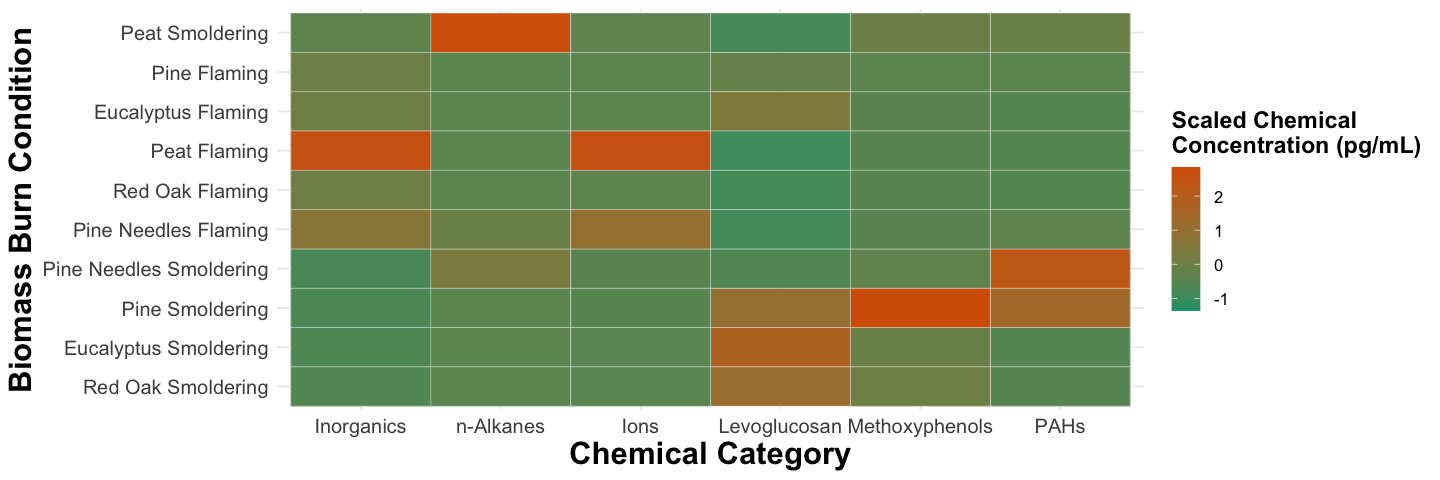

In [13]:
options(repr.plot.width = 12, repr.plot.height = 4)
ggplot(data = scaled_longer_smoke_data, aes(x = Chemical.Category, y = Biomass_Burn_Condition,
                                           fill = Scaled_Chemical_Concentration)) + 
  geom_tile(color = 'white') + # adds white space between the tiles

  theme_minimal() + # changing the theme
  theme(axis.text = element_text(size = 12), # changing size of axis labels
      axis.title = element_text(face = "bold", size = rel(1.7)), # changes axis titles
      legend.title = element_text(face = 'bold', size = 14), # changes legend title
      legend.text = element_text(size = 10)) + # changes legend text

  labs(x = 'Chemical Category', y = 'Biomass Burn Condition', 
       fill = "Scaled Chemical\nConcentration (pg/mL)") + # changing axis labels 
  scale_fill_gradient(low = rcolorbrewer_colors[1], high = rcolorbrewer_colors[2]) # changing the colors

*With this, we can answer **Environmental Health Question #2***: Under which biomass burn conditions, are concentrations of certain chemical categories the highest?

**Answer**: Ordering the axes from highest to lowest concentration didn't help organize the as much as we would've liked given some of the variance of chemical concentrations across the chemical categories. However, it's still clear that smoldering pine needles produced the highest concentration of PAHs, smoldering pine with Methoxyphenols, smoldering eucalyptus with Levoglucosan, flaming peat with ions, smoldering peat with n-Alkanes, and flaming peat with inorganic elements. In addition, flaming conditions seem to have higher levels of inorganics, n-Alkanes, and ions while smoldering conditions seems to have higher levels of levoglucosan, methoxyphenols, and PAHs.

Please note that the heat map generated above is not color blind friendly. It's advisable to use colors for manuscript figures that everyone will be able to see. Check out these [Stack overflow answers about color blind-safe color palettes and packages](https://stackoverflow.com/questions/57153428/r-plot-color-combinations-that-are-colorblind-accessible). Popular packages for generating colorblind-friendly palettes include [viridis](https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html) and [rcartocolor](https://github.com/Nowosad/rcartocolor).

## Additional Resources

+ [Beginner's Guide to Data Visualizations](https://towardsdatascience.com/beginners-guide-to-enhancing-visualizations-in-r-9fa5a00927c9) and [Improving Data Visualizations in R](https://towardsdatascience.com/8-tips-for-better-data-visualization-2f7118e8a9f4)
+ [Generating Colors for Visualizations](https://blog.datawrapper.de/colorguide/)
+ [Additional Hands on Training](https://github.com/hbctraining/publication_perfect)

Lastly, for researchers who are newer to R programming, [`ggpubr`](http://www.sthda.com/english/articles/24-ggpubr-publication-ready-plots/) is a package specifically designed to create publication-ready graphs similar to`ggplot2` with more concise syntax. This package is particularly useful for statistically relevant visualizations, which are further explored in later modules including, [TAME 2.0 Module 3.4 Introduction to Statistical Tests](insert link), [TAME 2.0 Module 4.4 Two Group Comparisons and Visualizations](insert link), and [TAME 2.0 Module 4.5 Multigroup Comparisons and Visualizations](insert link).

<br>

## Test Your Knowledge
Replicate the figure below! The heat map is the same as the "Test Your Knowledge" figure from [TAME 2.0 Module 3.1 Data Visualizations](add link). This time we'll focus on making the figure look more publication ready by cleaning up the titles, cleaning up the labels, and changing the colors.

**Hint 1**: To view additional aspects of figures that can be changed in `ggplot2` check out this [GGPlot2 Cheat Sheet](https://www.maths.usyd.edu.au/u/UG/SM/STAT3022/r/current/Misc/data-visualization-2.1.pdf). It might come in handy!

**Hint 2**: The color
<img src="Module3_2/Module3_2_TYK_figure.png"  />